In [1]:
import pandas as pd
import numpy as np
import os

#### Merging 12 months of sales data into a single file

In [2]:
files =  [file for file in os.listdir('./Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
# define an empty df to store our data:
all_months_data = pd.DataFrame()

files =  [file for file in os.listdir('./Sales_Data')]
for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.shape

(186850, 6)

In [4]:
# save all_months_data to a separate csv file
all_months_data.to_csv('all_data.csv', index = False)

#### Read in updated dataFrame

In [5]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


---

##### **QUESTION 1: What was the best month for sales? How much was earned in that month?**

**Answer:** The best month for sales is December. This is likely due to the occurrence of Christmas during the month of December -- the largest shopping holiday in the United States, annually. 

In [6]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
df = pd.DataFrame([all_data['Quantity Ordered'], all_data['Price Each'], 
                   all_data['Order Date']])
df = np.transpose(df)

In [8]:
df.head()

,Quantity Ordered,Price Each,Order Date
0,2,11.95,04/19/19 08:46
1,NaN,NaN,NaN
2,1,99.99,04/07/19 22:30
3,1,600,04/12/19 14:38
4,1,11.99,04/12/19 14:38


#### Clean data

Drop the rows that contain the column headings as data, drop NaN values, reset indexes, set values to their appropriate dType

In [9]:
# drop rows that contain the column headings as data
df = df[df['Quantity Ordered'].str[:2] != 'Qu']

In [10]:
# drop NaN values
df.dropna(inplace=True)

In [11]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [12]:
df.head()

,Quantity Ordered,Price Each,Order Date
0,2,11.95,04/19/19 08:46
2,1,99.99,04/07/19 22:30
3,1,600,04/12/19 14:38
4,1,11.99,04/12/19 14:38
5,1,11.99,04/30/19 09:27


In [13]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [14]:
df['Earned'] = df['Quantity Ordered'] * df['Price Each']

In [15]:
df.head()

,Quantity Ordered,Price Each,Order Date,Earned
0,2,11.95,04/19/19 08:46,23.90
2,1,99.99,04/07/19 22:30,99.99
3,1,600.00,04/12/19 14:38,600.00
4,1,11.99,04/12/19 14:38,11.99
5,1,11.99,04/30/19 09:27,11.99


In [16]:
df = df.reset_index(drop=True)

In [17]:
df['Month'] = pd.to_numeric(df['Order Date'].str[:2])

In [18]:
df['Month'].unique() #ensure it's only month values (no Nan, no column names) and that all months are represented

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [19]:
sales_per_month = df.groupby('Month').sum()

#### Visualize Question 1

In [20]:
import matplotlib.pyplot as plt

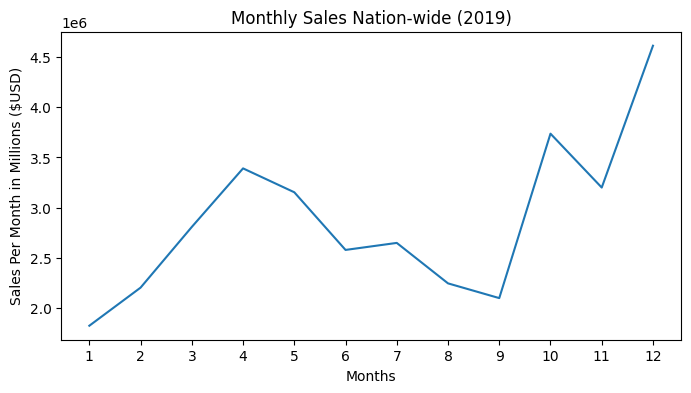

In [21]:
months = np.arange(1, 13)

fig_q1 = plt.figure(figsize=(8,4))

plt.plot(months, sales_per_month['Earned'])
plt.xticks(months)

plt.xlabel('Months')
plt.ylabel('Sales Per Month in Millions ($USD)')
plt.title('Monthly Sales Nation-wide (2019)')

plt.show()

---

##### **QUESTION 2: What city sold the most products?**

**Answer:** The city that sold the most products (and earned the most in sales) is San Fransisco. This could be due to the overall population, the high frequency of technical work that may require more expensive products such as laptops, the average income within Silicon Valley that allows for more spending, etc. Similarly, the graph shows that the cities that sold the most products earned the most income, and vice versa. This shows that there aren't cities that are buying any more expensive products, but fewer products total, than any other city -- within this dataset.

In [22]:
df.head()

,Quantity Ordered,Price Each,Order Date,Earned,Month
0,2,11.95,04/19/19 08:46,23.90,4
1,1,99.99,04/07/19 22:30,99.99,4
2,1,600.00,04/12/19 14:38,600.00,4
3,1,11.99,04/12/19 14:38,11.99,4
4,1,11.99,04/30/19 09:27,11.99,4


In [23]:
# from the first round of data cleaning, we know that sufficiently clean data has an x value of 185,950
df.shape

(185950, 5)

In [24]:
# clean data
temp = pd.Series(all_data['Purchase Address'][all_data['Purchase Address'].str[:1] != 'P'])
temp.dropna(inplace=True)
df['City'] = temp

In [25]:
df['City'] = temp.reset_index(drop=True)

In [26]:
df.head()

,Quantity Ordered,Price Each,Order Date,Earned,Month,City
0,2,11.95,04/19/19 08:46,23.90,4,"917 1st St, Dallas, TX 75001"
1,1,99.99,04/07/19 22:30,99.99,4,"682 Chestnut St, Boston, MA 02215"
2,1,600.00,04/12/19 14:38,600.00,4,"669 Spruce St, Los Angeles, CA 90001"
3,1,11.99,04/12/19 14:38,11.99,4,"669 Spruce St, Los Angeles, CA 90001"
4,1,11.99,04/30/19 09:27,11.99,4,"333 8th St, Los Angeles, CA 90001"


In [27]:
def get_city_state(address):
    city = address.split(',')[1]
    state = address.split(',')[2].split(' ')[1]
    return f'{city} ({state})'

In [28]:
df['City'] = df['City'].apply(lambda x: get_city_state(x))

In [29]:
df.head()

,Quantity Ordered,Price Each,Order Date,Earned,Month,City
0,2,11.95,04/19/19 08:46,23.90,4,Dallas (TX)
1,1,99.99,04/07/19 22:30,99.99,4,Boston (MA)
2,1,600.00,04/12/19 14:38,600.00,4,Los Angeles (CA)
3,1,11.99,04/12/19 14:38,11.99,4,Los Angeles (CA)
4,1,11.99,04/30/19 09:27,11.99,4,Los Angeles (CA)


In [30]:
results = df.groupby('City').sum()

From this, we can see that San Fransisco bought the most products, as well as earned the most in sales.

To plot this, we need to have a list of just the unique values of the cities available. However, just using the .unique() method would cause the cities to change order form the list above. In order to remedy this, we can use the following:

In [31]:
cities = [city for city, result in df.groupby('City')] # a list comprehension for the elements in the .groupby() to ensure correct order

#### Visualization of Question 2

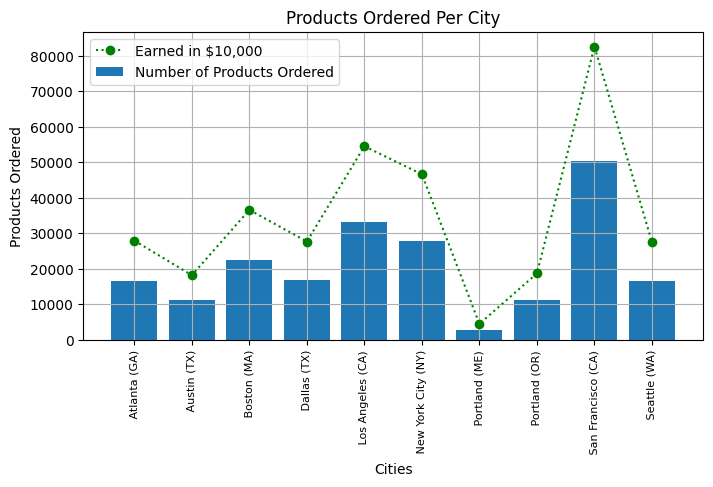

In [32]:
fig_q2 = plt.figure(figsize=(8,4))

# ax1 = fig_q2.add_subplot(1, 2, 1)
plt.bar(cities, results['Quantity Ordered'], label='Number of Products Ordered')
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('Cities')
plt.ylabel('Products Ordered')
plt.title('Products Ordered Per City')

plt.plot(cities, results['Earned']/100, ':og', label='Earned in $10,000')

plt.legend()
plt.grid()
plt.show()

---

##### **QUESTION 3: What time should we display advertisements to maximize the likelihood of customers buying products?**

**Answer:** The best time to show ads is during either 12:00 pm or 11:00 pm, as these are the times that the most orders are placed. This will increase the chances of ads being seen, as this means this is the time that the most active users are interacting with the website.

In [33]:
df_orders = pd.DataFrame({
    'Order ID': all_data['Order ID'],
    'When Occured': all_data['Order Date'],
})

In [34]:
df_orders = df_orders[df_orders['Order ID'].str[:1] != 'O']

In [35]:
df_orders.dropna(inplace=True)
df_orders = df_orders.reset_index(drop=True)

In [36]:
df_orders['When Occured'] = pd.to_datetime(df_orders['When Occured'])

C:\Users\cleon\AppData\Local\Temp\ipykernel_6376\418175076.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orders['When Occured'] = pd.to_datetime(df_orders['When Occured'])


In [37]:
df_orders['Hours'] = df_orders['When Occured'].dt.hour
df_orders['Min'] = df_orders['When Occured'].dt.minute

In [38]:
df_orders.head()

,Order ID,When Occured,Hours,Min
0,176558,2019-04-19 08:46:00,8,46
1,176559,2019-04-07 22:30:00,22,30
2,176560,2019-04-12 14:38:00,14,38
3,176560,2019-04-12 14:38:00,14,38
4,176561,2019-04-30 09:27:00,9,27


In [39]:
hours = np.arange(0, 24)

In [40]:
orders = df_orders.groupby(['Hours']).count()['Order ID']
orders

Hours
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

#### Visualization of Question 3

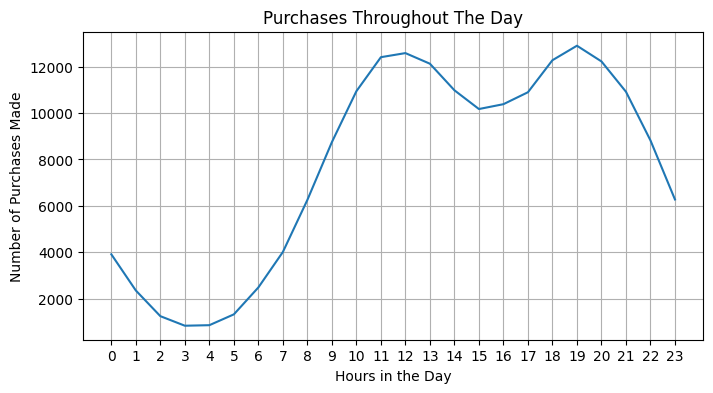

In [41]:
fig_q3 = plt.figure(figsize=(8,4))

plt.plot(hours, orders)
plt.xlabel('Hours in the Day')
plt.ylabel('Number of Purchases Made')
plt.xticks(hours) 

plt.title('Purchases Throughout The Day')
plt.grid()
plt.show()

---

##### **QUESTION 4: What products are most often sold together?**

**Answer:** The top 3 products that are most often purchased together are:
1. An iPhone & a Lightning Charging Cable: 1005 occurances
2. A Google Phone and a USB-C Charging Cable: 987 occurances
3. An iPhone and a set of Wired Headphones: 447 occurances

In order to find out which products most often sold together, we need to look for entries that share the same order ID, meaning that they were purchased at the same time. This will involve the product item name and order ID.

In [42]:
df_together = pd.DataFrame({
    'Order': all_data['Order ID'],
    'Product': all_data['Product']
})

df_together.shape

(186850, 2)

In [43]:
df_together = df_together[df_together['Order'].str[:1] != 'O']
df_together.dropna(inplace=True)
df_together = df_together.reset_index(drop=True)

In [44]:
df_together.shape

(185950, 2)

In [45]:
df_together.head(20)

,Order,Product
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,Google Phone
3,176560,Wired Headphones
4,176561,Wired Headphones
5,176562,USB-C Charging Cable
6,176563,Bose SoundSport Headphones
7,176564,USB-C Charging Cable
8,176565,Macbook Pro Laptop
9,176566,Wired Headphones


Now that we have the order # and the product, we need to look for duplicate order numbers to identify which products where most often purchased together. Once identified, we can put these products on the same row so as the order number so that we know they were purchased together;

In [46]:
df_together['Order'].duplicated(keep=False) #keep = False marks all as duplicates, not just the first or last ones
df_together['Grouped'] = df_together.groupby(['Order'])['Product'].transform(lambda x: ', '.join(x))

In [47]:
df_together = df_together[df_together['Order'].duplicated(keep=False)] #only keep rows with more than one purchase

In [48]:
df_together.head()

,Order,Product,Grouped
2,176560,Google Phone,"Google Phone, Wired Headphones"
3,176560,Wired Headphones,"Google Phone, Wired Headphones"
17,176574,Google Phone,"Google Phone, USB-C Charging Cable"
18,176574,USB-C Charging Cable,"Google Phone, USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones, Bose SoundSport He..."


In [49]:
df_together = df_together[['Order', 'Grouped']].drop_duplicates()

In [50]:
df_together.head(10)

,Order,Grouped
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"
128,176681,"Apple Airpods Headphones, ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
188,176739,"34in Ultrawide Monitor, Google Phone"
224,176774,"Lightning Charging Cable, USB-C Charging Cable"
232,176781,"iPhone, Lightning Charging Cable"


By using itertools and collections, we can analyze this data further by counting combinations.

This solution described in reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary 

In [51]:
from itertools import combinations
from collections import Counter

In [52]:
count = Counter()

for row in df_together['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # count the items in pairs of 2

In [53]:
count.most_common(6) # .most_common() is a method that comes with Counter from collections

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360)]

---

##### **QUESTION 5: What products sold the most? Why do you think?**

**Answer:** The highest selling products are items such as AAA or AA batteries, charging cables, etc. These items are cheap and relatively disposable. Batteries need to be replaced. It's not uncommon for individuals to have multiple charging cables or require a replacement cable should one get lost or damaged. These items are also significantly cheapter than other, more permenant products such as phones, computers, etc. Since this question is particularly concerned with how many of each product is purchased, it makes sense that the products that are cheap and often have to be replaced sell the most frequently. 

In [54]:
df_total = pd.DataFrame({
    'Product': all_data['Product'],
    'Number Sold': all_data['Quantity Ordered']
})

#clean the data
df_total = df_total[df_total['Product'].str[:1] != 'P']
df_total.dropna(inplace=True)
df_total = df_total.reset_index(drop=True)

In [55]:
df_total.shape

(185950, 2)

In [56]:
df_total['Number Sold'] = pd.to_numeric(df_total['Number Sold'])

In [57]:
df_total.head()

,Product,Number Sold
0,USB-C Charging Cable,2
1,Bose SoundSport Headphones,1
2,Google Phone,1
3,Wired Headphones,1
4,Wired Headphones,1


In [58]:
products_sold = df_total.groupby(['Product']).sum()
products_sold

,Number Sold
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


In [59]:
products = [product for product, result in df_total.groupby('Product')]

#### Visualize Question 5

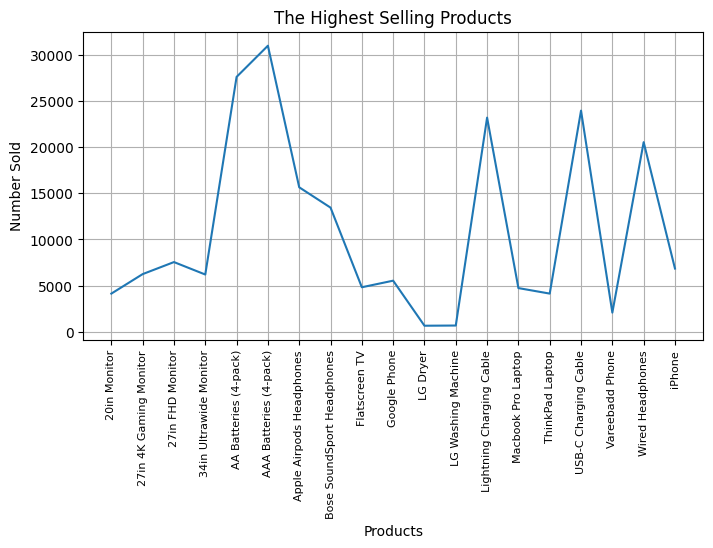

In [60]:
fig_q5 = plt.figure(figsize=(8,4))

plt.plot(products, products_sold)
plt.ylabel('Number Sold')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=8)
plt.title('The Highest Selling Products')

plt.grid()
plt.show()

---

##### **BONUS QUESTION 6: What individual product makes us the most money?**

**Answer:** As hypothesized with Question 5, the products that sell most frequently bring in a very small percentage of the overall money earned through sales. The product that makes the most, The MacBook Pro, is one of the lowest selling items in terms of units sold. Similarly, the AAA battery -- the item that sold the most -- is essentially the product that brings in the least amount of monetary value. 

Interestingly enough, the product that sold the least in Question 5 (the LG Washer and Dryer) also accounts for some of the lowest monetary sales. Perhaps this is due to better alternatives, pricing, or perhaps the appeal of a washer and dryer opposed to a MacBook Pro or Phone. It may also have something to do with the lifespan of a product such as a washer or dryer, requiring very infrequently replacement or upgrade in its entirety. This is an interesting result that could use further exploration.

In [61]:
df_sales = pd.DataFrame({
    'Item': df_total['Product'],
    'Sales': df['Earned']
})

In [62]:
sales = df_sales.groupby(['Item']).sum()

In [63]:
sales

,Sales
Item,
20in Monitor,454148.71
27in 4K Gaming Monitor,2435097.56
27in FHD Monitor,1132424.50
34in Ultrawide Monitor,2355558.01
AA Batteries (4-pack),106118.40
AAA Batteries (4-pack),92740.83
Apple Airpods Headphones,2349150.00
Bose SoundSport Headphones,1345565.43
Flatscreen TV,1445700.00


#### Visualize Question 6

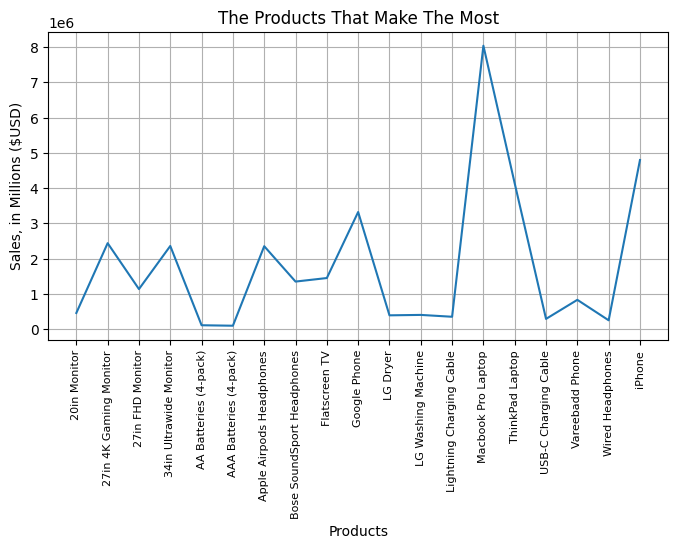

In [64]:
# using products from above;
fig_q6 = plt.figure(figsize=(8,4))

plt.plot(products, sales)
plt.xlabel('Products')
plt.ylabel('Sales, in Millions ($USD)')
plt.xticks(products, rotation='vertical', size=8)
plt.title('The Products That Make The Most')

plt.grid()
plt.show()

In [66]:
# fig_q1.savefig('Q1.png', bbox_inches='tight')
# fig_q2.savefig('Q2.png', bbox_inches='tight')
# fig_q3.savefig('Q3.png', bbox_inches='tight')
# fig_q5.savefig('Q5.png', bbox_inches='tight')
# fig_q6.savefig('Q6.png', bbox_inches='tight')